# Load data

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
p_data = "data/horse_colic.csv"
pdf_horse_colic = pd.read_csv(p_data)
pdf_horse_colic = pdf_horse_colic.replace("?", np.NaN)
pdf_horse_colic = pdf_horse_colic.astype(np.float)
pdf_horse_colic.head()

,surgery,Age,Hospital Number,rectal temperature,pulse,respiratory rate,temperature of extremities,peripheral pulse,mucous membranes,capillary refill time,...,packed cell volume,total protein,abdominocentesis appearance,abdomcentesis total protein,outcome,surgical lesion,type of lesion 1,type of lesion 2,type of lesion 3,cp_data
0,2.0,1.0,530101.0,38.5,66.0,28.0,3.0,3.0,NaN,2.0,...,45.0,8.4,NaN,NaN,2.0,2.0,11300.0,0.0,0.0,2.0
1,1.0,1.0,534817.0,39.2,88.0,20.0,NaN,NaN,4.0,1.0,...,50.0,85.0,2.0,2.0,3.0,2.0,2208.0,0.0,0.0,2.0
2,2.0,1.0,530334.0,38.3,40.0,24.0,1.0,1.0,3.0,1.0,...,33.0,6.7,NaN,NaN,1.0,2.0,0.0,0.0,0.0,1.0
3,1.0,9.0,5290409.0,39.1,164.0,84.0,4.0,1.0,6.0,2.0,...,48.0,7.2,3.0,5.3,2.0,1.0,2208.0,0.0,0.0,1.0
4,2.0,1.0,530255.0,37.3,104.0,35.0,NaN,NaN,6.0,2.0,...,74.0,7.4,NaN,NaN,2.0,2.0,4300.0,0.0,0.0,2.0


In [3]:
# check number of null
display(pdf_horse_colic.isnull().sum())

surgery                          1
Age                              0
Hospital Number                  0
rectal temperature              60
pulse                           24
respiratory rate                58
temperature of extremities      56
peripheral pulse                69
mucous membranes                47
capillary refill time           32
pain                            55
peristalsis                     44
abdominal distension            56
nasogastric tube               104
nasogastric reflux             106
nasogastric reflux PH          247
rectal examination             102
abdomen                        118
packed cell volume              29
total protein                   33
abdominocentesis appearance    165
abdomcentesis total protein    198
outcome                          1
surgical lesion                  0
type of lesion 1                 0
type of lesion 2                 0
type of lesion 3                 0
cp_data                          0
dtype: int64

In [4]:
# observing stats
display(pdf_horse_colic.describe().transpose())

,count,mean,std,min,25%,50%,75%,max
surgery,299.0,1.397993e+00,4.903046e-01,1.0,1.00,1.00,2.0,2.0
Age,300.0,1.640000e+00,2.173972e+00,1.0,1.00,1.00,1.0,9.0
Hospital Number,300.0,1.085889e+06,1.529801e+06,518476.0,528904.00,530305.50,534727.5,5305629.0
rectal temperature,240.0,3.816792e+01,7.322887e-01,35.4,37.80,38.20,38.5,40.8
pulse,276.0,7.191304e+01,2.863056e+01,30.0,48.00,64.00,88.0,184.0
respiratory rate,242.0,3.041736e+01,1.764223e+01,8.0,18.50,24.50,36.0,96.0
temperature of extremities,244.0,2.348361e+00,1.045054e+00,1.0,1.00,3.00,3.0,4.0
peripheral pulse,231.0,2.017316e+00,1.042428e+00,1.0,1.00,2.00,3.0,4.0
mucous membranes,253.0,2.853755e+00,1.620294e+00,1.0,1.00,3.00,4.0,6.0
capillary refill time,268.0,1.305970e+00,4.776285e-01,1.0,1.00,1.00,2.0,3.0


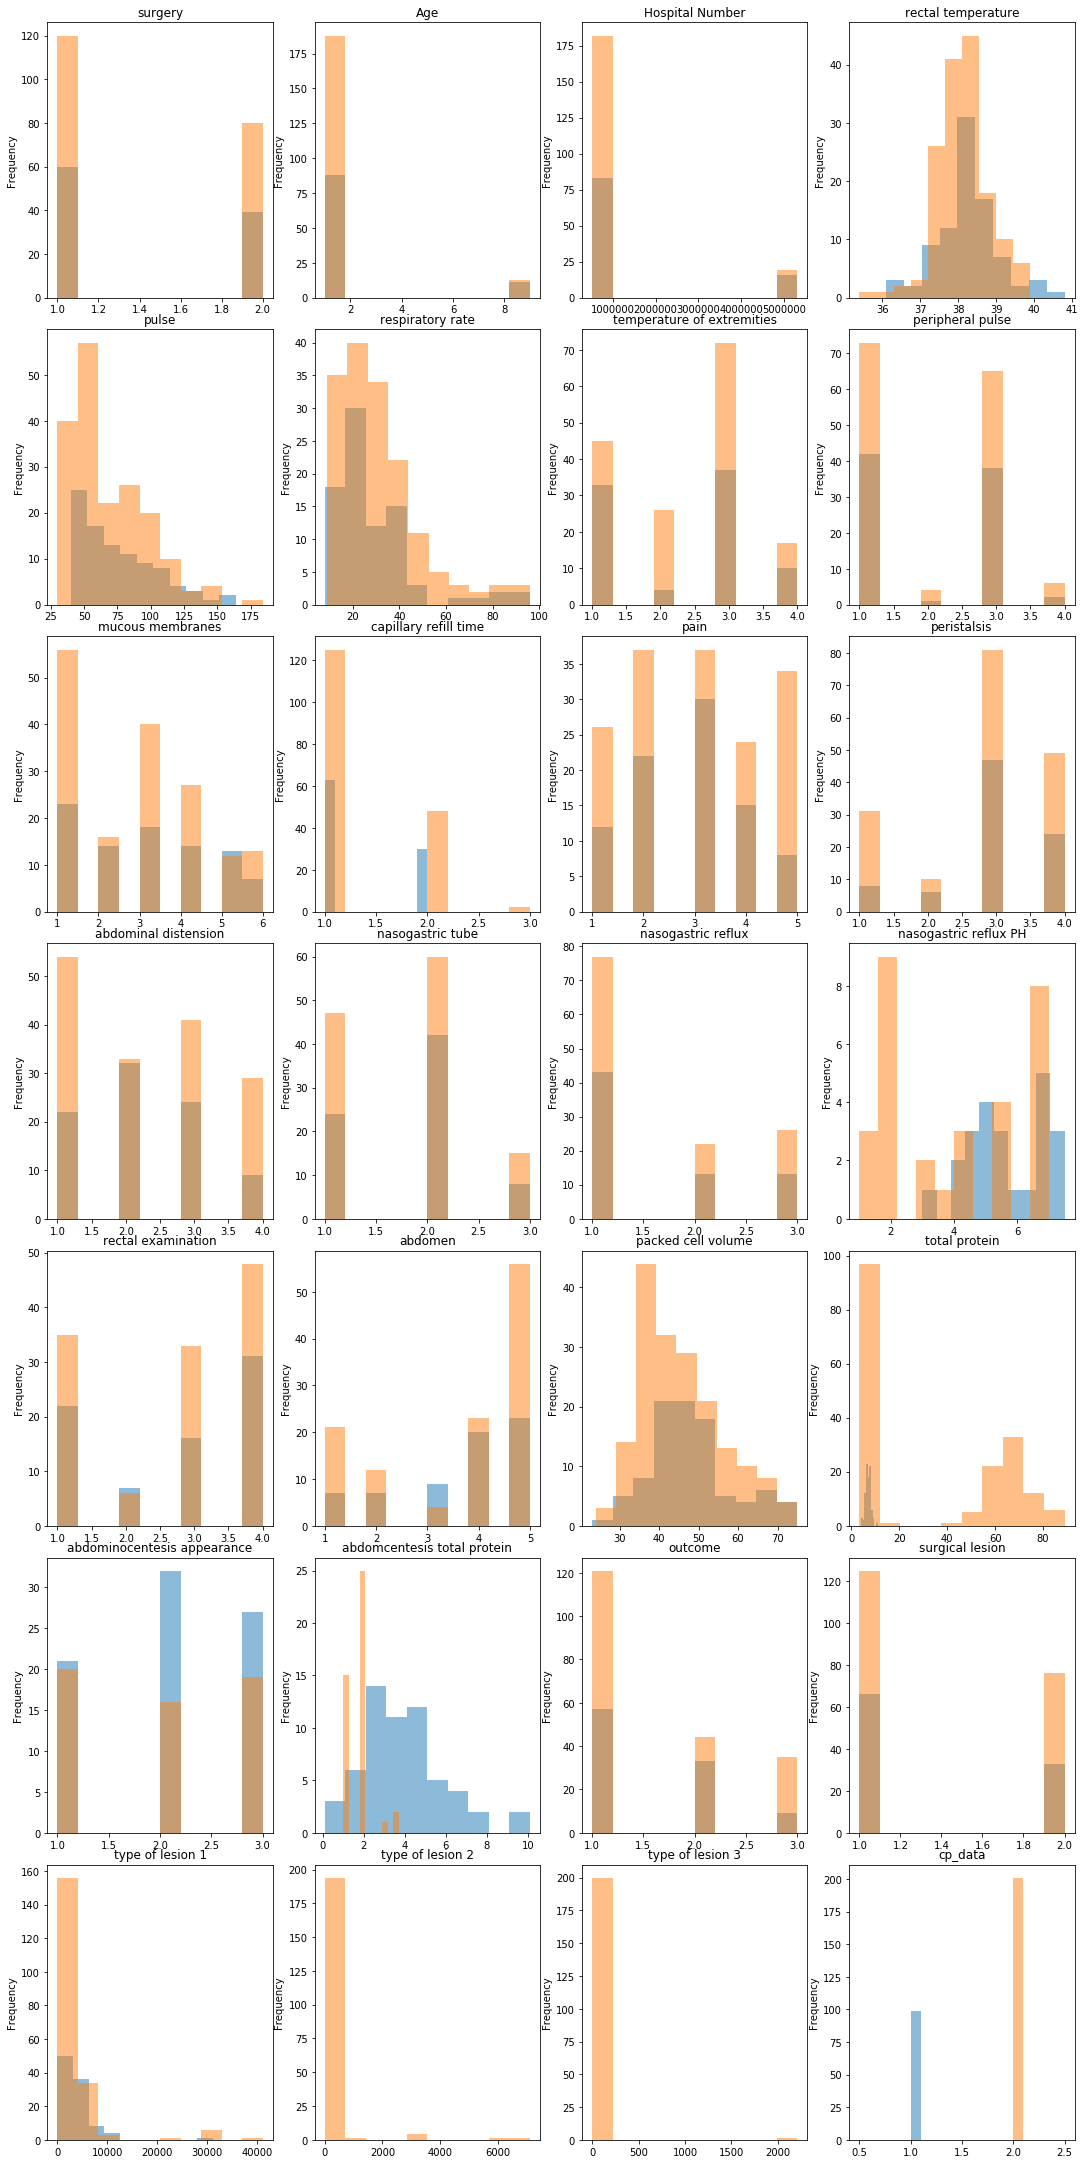

In [5]:
%matplotlib inline
n_col = 4
n_row = int(math.ceil(pdf_horse_colic.shape[1] * 1.0/n_col))
fig, axes = plt.subplots(n_row, n_col, figsize=(15, 30))
plt.tight_layout()
for i, col in enumerate(pdf_horse_colic.columns):
    pos_i = i / n_col
    pos_j = i % n_col
    pdf_horse_colic.groupby("cp_data")[col].plot.hist(title=col, alpha=0.5, ax=axes[pos_i, pos_j]);

# Pandas query

In [26]:
# SELECT, WHERE, DISTINCT, LIMIT
print "-- select * from tbl limit 3"
display(pdf_horse_colic.head(3))

print "-- select Age from tbl where pulse = 66"
display(pdf_horse_colic[pdf_horse_colic["pulse"] == 66.0]["Age"])

print "-- select distinct Age from tbl"
display(pdf_horse_colic["Age"].unique())

-- select * from tbl limit 3


,surgery,Age,Hospital Number,rectal temperature,pulse,respiratory rate,temperature of extremities,peripheral pulse,mucous membranes,capillary refill time,...,packed cell volume,total protein,abdominocentesis appearance,abdomcentesis total protein,outcome,surgical lesion,type of lesion 1,type of lesion 2,type of lesion 3,cp_data
0,2.0,1.0,530101.0,38.5,66.0,28.0,3.0,3.0,NaN,2.0,...,45.0,8.4,NaN,NaN,2.0,2.0,11300.0,0.0,0.0,2.0
1,1.0,1.0,534817.0,39.2,88.0,20.0,NaN,NaN,4.0,1.0,...,50.0,85.0,2.0,2.0,3.0,2.0,2208.0,0.0,0.0,2.0
2,2.0,1.0,530334.0,38.3,40.0,24.0,1.0,1.0,3.0,1.0,...,33.0,6.7,NaN,NaN,1.0,2.0,0.0,0.0,0.0,1.0


-- select Age from tbl where pulse = 66


0      1.0
10     1.0
163    1.0
223    1.0
285    1.0
292    1.0
Name: Age, dtype: float64

-- select distinct Age from tbl


array([1., 9.])

In [29]:
# SELECT with multiple conditions
print "-- select * from tbl where Age = 1 and pulse = 66"
display(pdf_horse_colic[(pdf_horse_colic["Age"] == 1) & (pdf_horse_colic["pulse"] == 66)])

print "-- select surgery, 'total protein' from tbl where Age = 1 and pulse = 66"
display(pdf_horse_colic[(pdf_horse_colic["Age"] == 1) & (pdf_horse_colic["pulse"] == 66)][["surgery", "total protein"]])

-- select * from tbl where Age = 1 and pulse = 66


,surgery,Age,Hospital Number,rectal temperature,pulse,respiratory rate,temperature of extremities,peripheral pulse,mucous membranes,capillary refill time,...,packed cell volume,total protein,abdominocentesis appearance,abdomcentesis total protein,outcome,surgical lesion,type of lesion 1,type of lesion 2,type of lesion 3,cp_data
0,2.0,1.0,530101.0,38.5,66.0,28.0,3.0,3.0,NaN,2.0,...,45.0,8.4,NaN,NaN,2.0,2.0,11300.0,0.0,0.0,2.0
10,1.0,1.0,528548.0,38.1,66.0,12.0,3.0,3.0,5.0,1.0,...,44.0,6.0,2.0,3.6,1.0,1.0,2124.0,0.0,0.0,1.0
163,1.0,1.0,533942.0,38.0,66.0,20.0,1.0,3.0,3.0,1.0,...,46.0,46.0,3.0,2.0,3.0,1.0,6209.0,0.0,0.0,2.0
223,1.0,1.0,528178.0,37.7,66.0,12.0,1.0,1.0,3.0,1.0,...,31.5,6.2,2.0,1.6,1.0,1.0,2208.0,0.0,0.0,1.0
285,1.0,1.0,5283431.0,38.5,66.0,24.0,1.0,1.0,1.0,1.0,...,40.0,6.7,1.0,NaN,1.0,1.0,31110.0,0.0,0.0,1.0
292,1.0,1.0,530034.0,37.0,66.0,20.0,1.0,3.0,2.0,1.0,...,35.0,6.9,2.0,NaN,2.0,1.0,31110.0,0.0,0.0,2.0


-- select surgery, 'total protein' from tbl where Age = 1 and pulse = 66


,surgery,total protein
0,2.0,8.4
10,1.0,6.0
163,1.0,46.0
223,1.0,6.2
285,1.0,6.7
292,1.0,6.9


In [32]:
# ORDER BY
print "-- select * from tbl where Age = 1 order by pulse"
display(pdf_horse_colic[pdf_horse_colic["Age"] == 1].sort_values("pulse").head())

print "-- select * from tbl where Age = 1 order by pulse desc"
display(pdf_horse_colic[pdf_horse_colic["Age"] == 1].sort_values("pulse", ascending=False).head())

-- select * from tbl where Age = 1 order by pulse


,surgery,Age,Hospital Number,rectal temperature,pulse,respiratory rate,temperature of extremities,peripheral pulse,mucous membranes,capillary refill time,...,packed cell volume,total protein,abdominocentesis appearance,abdomcentesis total protein,outcome,surgical lesion,type of lesion 1,type of lesion 2,type of lesion 3,cp_data
130,1.0,1.0,528964.0,37.8,30.0,12.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,1.0,2113.0,0.0,0.0,2.0
232,1.0,1.0,5262543.0,38.5,30.0,18.0,NaN,NaN,NaN,NaN,...,40.0,7.7,NaN,NaN,1.0,1.0,2113.0,0.0,0.0,2.0
276,1.0,1.0,534787.0,38.0,36.0,16.0,3.0,1.0,1.0,1.0,...,37.0,75.0,2.0,1.0,3.0,2.0,3111.0,0.0,0.0,2.0
203,2.0,1.0,529685.0,37.2,36.0,9.0,1.0,1.0,1.0,1.0,...,35.0,5.7,NaN,NaN,1.0,2.0,31110.0,0.0,0.0,2.0
242,1.0,1.0,530354.0,NaN,36.0,32.0,1.0,1.0,4.0,1.0,...,41.0,5.9,NaN,NaN,2.0,1.0,2205.0,0.0,0.0,2.0


-- select * from tbl where Age = 1 order by pulse desc


,surgery,Age,Hospital Number,rectal temperature,pulse,respiratory rate,temperature of extremities,peripheral pulse,mucous membranes,capillary refill time,...,packed cell volume,total protein,abdominocentesis appearance,abdomcentesis total protein,outcome,surgical lesion,type of lesion 1,type of lesion 2,type of lesion 3,cp_data
44,1.0,1.0,535407.0,35.4,140.0,24.0,3.0,3.0,4.0,2.0,...,57.0,69.0,3.0,2.0,3.0,1.0,3205.0,0.0,0.0,2.0
148,1.0,1.0,529272.0,38.3,132.0,NaN,NaN,3.0,6.0,2.0,...,57.0,8.0,NaN,5.2,1.0,1.0,2112.0,0.0,0.0,1.0
63,2.0,1.0,534293.0,38.2,130.0,16.0,4.0,3.0,4.0,2.0,...,65.0,82.0,2.0,2.0,3.0,2.0,2209.0,1400.0,0.0,2.0
172,1.0,1.0,535292.0,38.5,129.0,48.0,3.0,3.0,3.0,1.0,...,57.0,66.0,3.0,2.0,1.0,1.0,2206.0,0.0,0.0,2.0
142,1.0,1.0,530402.0,NaN,120.0,NaN,4.0,3.0,6.0,2.0,...,57.0,4.5,3.0,3.9,2.0,1.0,3205.0,0.0,0.0,1.0


In [35]:
# IN… NOT IN
print "-- select * from tbl where 'total protein' in (69, 82)"
display(pdf_horse_colic[pdf_horse_colic["total protein"].isin([69, 82])])

print "-- select * from tbl where 'total protein' not in (69, 82)"
display(pdf_horse_colic[~pdf_horse_colic["total protein"].isin([69, 82])].head())

-- select * from tbl where 'total protein' in (69, 82)


,surgery,Age,Hospital Number,rectal temperature,pulse,respiratory rate,temperature of extremities,peripheral pulse,mucous membranes,capillary refill time,...,packed cell volume,total protein,abdominocentesis appearance,abdomcentesis total protein,outcome,surgical lesion,type of lesion 1,type of lesion 2,type of lesion 3,cp_data
44,1.0,1.0,535407.0,35.4,140.0,24.0,3.0,3.0,4.0,2.0,...,57.0,69.0,3.0,2.0,3.0,1.0,3205.0,0.0,0.0,2.0
63,2.0,1.0,534293.0,38.2,130.0,16.0,4.0,3.0,4.0,2.0,...,65.0,82.0,2.0,2.0,3.0,2.0,2209.0,1400.0,0.0,2.0
95,1.0,1.0,535158.0,37.3,48.0,20.0,NaN,1.0,2.0,1.0,...,41.0,69.0,NaN,NaN,1.0,1.0,3205.0,0.0,0.0,2.0
260,2.0,1.0,534933.0,38.0,40.0,25.0,NaN,1.0,1.0,1.0,...,37.0,69.0,NaN,NaN,1.0,2.0,0.0,0.0,0.0,2.0


-- select * from tbl where 'total protein' not in (69, 82)


,surgery,Age,Hospital Number,rectal temperature,pulse,respiratory rate,temperature of extremities,peripheral pulse,mucous membranes,capillary refill time,...,packed cell volume,total protein,abdominocentesis appearance,abdomcentesis total protein,outcome,surgical lesion,type of lesion 1,type of lesion 2,type of lesion 3,cp_data
0,2.0,1.0,530101.0,38.5,66.0,28.0,3.0,3.0,NaN,2.0,...,45.0,8.4,NaN,NaN,2.0,2.0,11300.0,0.0,0.0,2.0
1,1.0,1.0,534817.0,39.2,88.0,20.0,NaN,NaN,4.0,1.0,...,50.0,85.0,2.0,2.0,3.0,2.0,2208.0,0.0,0.0,2.0
2,2.0,1.0,530334.0,38.3,40.0,24.0,1.0,1.0,3.0,1.0,...,33.0,6.7,NaN,NaN,1.0,2.0,0.0,0.0,0.0,1.0
3,1.0,9.0,5290409.0,39.1,164.0,84.0,4.0,1.0,6.0,2.0,...,48.0,7.2,3.0,5.3,2.0,1.0,2208.0,0.0,0.0,1.0
4,2.0,1.0,530255.0,37.3,104.0,35.0,NaN,NaN,6.0,2.0,...,74.0,7.4,NaN,NaN,2.0,2.0,4300.0,0.0,0.0,2.0


In [39]:
# GROUP BY, COUNT, ORDER BY
print "-- select surgery, Age, count(*) from tbl group by surgery, Age order by surgery, Age"
display(pdf_horse_colic.groupby(["surgery", "Age"]).size())

print "-- select surgery, Age, count(*) from tbl group by surgery, Age order by surgery, count(*) desc"
display(pdf_horse_colic.groupby(["surgery", "Age"]).size()\
        .to_frame("size").reset_index()\
        .sort_values(["surgery", "size"], ascending=[True, False]))

-- select surgery, Age, count(*) from tbl group by surgery, Age order by surgery, Age


surgery  Age
1.0      1.0    162
         9.0     18
2.0      1.0    113
         9.0      6
dtype: int64

-- select surgery, Age, count(*) from tbl group by surgery, Age order by surgery, count(*) desc


,surgery,Age,size
0,1.0,1.0,162
1,1.0,9.0,18
2,2.0,1.0,113
3,2.0,9.0,6


In [45]:
# HAVING
print "-- select Age, count(*) from tbl where surgery = 2 group by Age having count(*) > 20 order by count(*) desc"
display(pdf_horse_colic[pdf_horse_colic["surgery"] == 2].groupby("Age")
        .filter(lambda g: len(g) > 20)\
        .groupby("Age").size())

-- select Age, count(*) from tbl where surgery = 2 group by Age having count(*) > 20 order by count(*) desc


Age
1.0    113
dtype: int64

In [48]:
# Top N records
print "-- select surgery from tbl order by pulse desc limit 10"
display(pdf_horse_colic.nlargest(10, columns="pulse")[["surgery"]])

print "-- select surgery from tbl order by pulse desc limit 10 offset 10"
display(pdf_horse_colic.nlargest(20, columns="pulse")[["surgery"]].tail(10))

-- select surgery from tbl order by pulse desc limit 10


,surgery
255,1.0
3,1.0
55,1.0
41,2.0
275,1.0
39,1.0
44,1.0
103,1.0
135,1.0
148,1.0


-- select surgery from tbl order by pulse desc limit 10 offset 10


,surgery
23,1.0
63,2.0
172,1.0
16,1.0
244,1.0
252,1.0
43,1.0
45,2.0
142,1.0
165,1.0
